Created on Wed Nov 10 15:03:06 2018
#### Author: Renjini Ramadasan Nair

##### Description of the data: 

Source citation: 
The data represents the census data from the UCI machine learning database (http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). Detailed information can be read by referring to the original publication (http://robotics.stanford.edu/~ronnyk/nbtree.pdf).

Data Cleaning (Optional to read this segment): 
There were 15 attributes, of which I have loaded 9 attributes/columns into a dataframe named 'adult' for further analyses. The 9 attributes were the age, workclass, fnlwgt, education-num, sex, capital-gain, capital-loss, hours-per-week and income columns. Of these, age, fnlwgt, capital-gain, capital-loss and hours-per-week were numerical attributes and the rest categorical. Initially there were 32561 rows. There were no null values in the numerical data columns, but were present in some categorical columns. Then I performed data cleaning by following the steps outlined below.
The numerical column 'fnlwgt' had outliers, which were replaced with the median value, followed by z-standardization. A plotted histogram showed that this attribute has a more or less normal distribution. 
For the 'capital-gain' and 'capital-loss' columns, the rows with a few extreme values (>20000 for capital-gain and >3000 for capital loss) were removed. These two columns were also standardized by z-normalization.
The outliers in the age column were replaced with the median of the non-null values. For the 'age' and 'hours-per-week' columns, the values were binned into 1 (low), 2 (medium) and 3 (high) categories. The obsolete parent columns were deleted.
For the 'education-num', 'workclass' and 'sex' variables, the categories were decoded, imputed and consolidated. The 'education-num' variable was categorized into Primary (all education lesser than college), Bachelor, Master, Professional and Doctorate. The Doctoral was later consolidated into Professional. The 'workclass' column was categorized into Private, Government and Unemployed categories. The missing values in the 'workclass' column were imputed with the most frequent 'Private' value. The 'sex' column had two categories , 'Male' and 'Female'. Dummy variables were derived for the all three categorical variables and the parental columns deleted.

Following the data cleaning, there were 32297 rows and 15 columns in the 'adult' dataframe. Of the 15, 3 are z-standardized numerical columns named 'fnlwgt', 'capital-gain' and 'capital-loss'. 'Binned_age' and 'Binned_hours-per-week' are binned columns of the original numerical attributes. There were 2, 3 and 4 columns derived by one-hot encoding of the 'sex', 'workclass' and 'education-num' categorical columns respectively. The 'income' column represents the expert labels, claasifying each instance into income <= or > than 50000.

In [2]:
# Import the Numpy and Pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
# Function definitions

# Function for checking for outliers in the numeric value columns 
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers

# Function to bin numerical columns
def bins(x, n): 
    BinWidth = (max(x) - min(x))/n
    bound1 = float('-inf')
    bound2 = min(x) + 1 * BinWidth
    bound3 = min(x) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(x)) 
    Binned[(bound1 < x) & (x <= bound2)] = 1 # Low
    Binned[(bound2 < x) & (x <= bound3)] = 2 # Med
    Binned[(bound3 < x) & (x  < bound4)] = 3 # High
    return Binned

# Function for z-standardization of a numerical column
def norm(col): 
    x = np.array(col).astype(float)
    X = pd.DataFrame(x) 
    y = StandardScaler().fit(X).transform(X)
    return y


In [4]:
# Download and load data from the url: http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult1 = pd.read_csv(url, header=None)

# Add column names
adult1.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Select the columns needed to fulfill the current objectives; save as a new dataframe
adult = adult1.loc[:, ['age', 'workclass', 'fnlwgt', 'education-num', 'sex', "capital-gain", "capital-loss", 'hours-per-week', 'income' ]]

In [5]:
# Remove/replace outliers for the numerical columns. 

# Replace outliers with median values for the numerical column, fnlwgt.
outliers = outlier(adult['fnlwgt'])
adult.loc[outliers, 'fnlwgt'] = np.median(adult.loc[:,"fnlwgt"])

# Remove rows with outlier values; For the capital-gain and capital-loss variables
# capital-gain
adult.loc[:,"capital-gain"].sort_values()
high1 = adult.loc[:,"capital-gain"] > 20000
adult = adult.loc[~high1, :]
# capital-loss
adult.loc[:,"capital-loss"].sort_values()
high2 = adult.loc[:,"capital-loss"] > 3000
adult = adult.loc[~high2, :]

In [6]:
# Normalize values for the numerical columns by z-standardization

# Normalize the fnlwgt column; plot the normalized fnlwgt data.
col = adult["fnlwgt"]
adult["fnlwgt"] = norm(col)

# Normalize the capital-gain column
col = adult["capital-gain"]
adult["capital-gain"] = norm(col)

# Normalize the capital-loss column
col = adult["capital-loss"]
adult["capital-loss"] = norm(col)

In [7]:
# Bin the numerical columns (age, hours-per-week)kmeans = KMeans(n_clusters=5).fit(adult_k)
# age - Equal-width Binning using numpy
x = np.array(adult['age'])
adult['Binned_age'] = bins(x, 6)
# hours-per-week - Equal-width Binning using numpy
x = np.array(adult['hours-per-week'])
adult['Binned_hours-per-week'] = bins(x, 6)

# Delete obsolete column age and hours-per-week columns
adult.drop('age', axis = 1, inplace = True)
adult.drop('hours-per-week', axis = 1, inplace = True)

In [8]:
# Decode education-num column, impute categories and consolidate
# Decode and impute
adult.loc[adult.loc[:, 'education-num'] <=12, 'education-num'] = 'Primary'
adult.loc[adult.loc[:, 'education-num'] ==13, 'education-num'] = 'Bachelor'
adult.loc[adult.loc[:, 'education-num'] ==14, 'education-num'] = 'Master'
adult.loc[adult.loc[:, 'education-num'] ==15, 'education-num'] = 'Professional'
adult.loc[adult.loc[:, 'education-num'] ==16, 'education-num'] = 'Doctorate'
# Consolidate professional and doctorate into professional
adult.loc[adult.loc[:, 'education-num'] =='Doctorate', 'education-num'] = 'Professional'

# Decode the other categorical variable, workclass; impute categories, consolidate and add dummy variables
adult.loc[(adult.loc[:, 'workclass'] == ' State-gov'), 'workclass'] = 'Government'
adult.loc[adult.loc[:, 'workclass'] == ' Self-emp-not-inc', 'workclass'] = 'Unemployed'
adult.loc[adult.loc[:, 'workclass'] == ' Federal-gov', 'workclass'] = 'Government'
adult.loc[adult.loc[:, 'workclass'] == ' Local-gov', 'workclass'] = 'Government'
adult.loc[adult.loc[:, 'workclass'] == ' Self-emp-inc', 'workclass'] = 'Private'
adult.loc[adult.loc[:, 'workclass'] == ' Without-pay', 'workclass'] = 'Unemployed'
adult.loc[adult.loc[:, 'workclass'] == ' Never-worked', 'workclass'] = 'Unemployed'
adult.loc[adult.loc[:, 'workclass'] == ' Private', 'workclass'] = 'Private'
# Private seems highest, so impute '?' with Private
adult.loc[adult.loc[:, 'workclass'] == ' ?', 'workclass'] = 'Private'
# Save the dataframe as a copy for plotting purpose
adult2 = adult.copy()
# add dummy variables
adult.loc[:, "Government"] = (adult.loc[:, "workclass"] == "Government").astype(int)
adult.loc[:, "Private"] = (adult.loc[: , "workclass"] == "Private").astype(int)
adult.loc[:, "Unemployed"] = (adult.loc[:, "workclass"] == "Unemployed").astype(int)
adult.drop('workclass', axis = 1, inplace = True)

# add dummy variables for the categorical column education-num
adult[['Bachelor', 'Master', 'Primary', 'Professional']] = pd.get_dummies(adult['education-num'])
# Delete the obsolete education-num column
adult.drop('education-num', axis = 1, inplace = True)

# add dummy variables for the sex column and delete parent column
adult[['Female', 'Male']] = pd.get_dummies(adult['sex'])
adult.drop('sex', axis = 1, inplace = True)

# Replace the '<=50K' and '>50K' with 1 and 0 respectively, in the income column
adult.loc[(adult.loc[:, 'income'] == ' <=50K'), 'income'] = 1
adult.loc[(adult.loc[:, 'income'] == ' >50K'), 'income'] = 0


In [9]:
# Remove the expert label column 'income' and save as another dataframe
adult_k = adult.loc[:, ['fnlwgt', 'capital-gain', 'capital-loss', 'Binned_age', 'Binned_hours-per-week', 'Bachelor', 'Master', 'Primary', 'Professional', 'Government', 'Private', 'Unemployed', 'Female', 'Male']]
# Use scikit-learn to perform clustering
kmeans = KMeans(n_clusters=6).fit(adult_k)
Labels = kmeans.labels_
ClusterCentroids = pd.DataFrame(kmeans.cluster_centers_)
# Add the labels obtained by clustering as a new column to the original dataframe
adult.loc[:, 'labels'] = Labels
# plt.hist(adult['labels']);

In [10]:
# Supervised learning: Is it possbile to classify the individulas into 2 income classes based on these 15 attributes?

# Split data into training and test sets
X = adult[['fnlwgt', 'capital-gain', 'capital-loss', 'Binned_age', 'Binned_hours-per-week', 'Bachelor', 'Master', 'Primary', 'Professional', 'Government', 'Private', 'Unemployed', 'Female', 'Male', 'labels']]
# Note: I removed the 'fnlwgt' column from analysis, because the removal increased the accuracy of the predictions.
# The 'income' column was used as the expert label column, based on the original data from the UCI database
Y = adult['income']
# Specifying model training on 80% of the data, by using a test-size of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [11]:
# Classification by Random Forest classifier
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter
clf = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss) # default parameters are fine
# Fit the model using the training set
clf.fit(X_train, Y_train)
# Predict for the test set
Y_preds = clf.predict(X_test)


In [12]:
# Metrics analyses
# Confusion Matrix using the default probability threshold of 0.5
CM = confusion_matrix(Y_test, Y_preds)
# TP, TN, FP, FN
tn, fp, fn, tp = CM.ravel()
# Accuracy rate
AR = accuracy_score(Y_test, Y_preds)
# Error rate
ER = 1.0 - AR
# Precision
P = precision_score(Y_test, Y_preds)
# Recall
R = recall_score(Y_test, Y_preds)
# F1 score
F1 = f1_score(Y_test, Y_preds)
# ROC analysis
# TP rates, FP rates and Probability thresholds
fpr, tpr, th = roc_curve(Y_test, Y_preds)
# AUC score (using auc function)
AUC = auc(fpr, tpr)

In [13]:
# Classification by Logistic Regression
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, Y_train)
Y_predsl = clf.predict(X_test)
# Metrics analyses
CML = confusion_matrix(Y_test, Y_predsl)
tnl, fpl, fnl, tpl = CML.ravel()
ARL = accuracy_score(Y_test, Y_predsl)
ERL = 1.0 - ARL
PL = precision_score(Y_test, Y_predsl)
RL = recall_score(Y_test, Y_predsl)
F1L = f1_score(Y_test, Y_predsl)
fprl, tprl, thl = roc_curve(Y_test, Y_predsl)
AUCL = auc(fprl, tprl)

In [14]:
# Create a datframe of actual and predicted classifications of the test set
adult_analysis = pd.DataFrame()
adult_analysis['Actual'] = Y_test
adult_analysis['RF_Predicted'] = Y_preds
adult_analysis['LR_Predicted'] = Y_predsl

In [15]:
# Main Body

# Main function: Plot a histogram of the standardized fnlwgt data
def _zstdplot_main(): 
    print('\nThe fnlwgt data plot after normlization by z-standardization: ')
    plt.hist(adult["fnlwgt"]);
    plt.title('The Z-standardized fnlwgt data')
    plt.xlabel('Final Weight')
    plt.ylabel('Frequency')
    plt.show()

def _edunumplot_main():
    print('\nPlot of the education-num categorical attribute after data cleaning: ')
    adult2['education-num'].value_counts().plot(kind='bar');
    plt.title('Education status')
    plt.xlabel('Education-score')
    plt.ylabel('Frequency')
    plt.show()
    
def _workclassplot_main():
    print('\nPlot of the workclass categorical attribute after data cleaning: ')
    adult2['workclass'].value_counts().plot(kind='bar')
    plt.title('Work Class by profession')
    plt.xlabel('Work Class')
    plt.ylabel('Frequency')
    plt.show()
    
# Main function: Print the edited dataframe
def _printdf_main(): 
    print('\nThe final adult dataframe with the clustered "labels":')
    print(adult.head())

# Main function: Save the predicted and real test labels as a csv file
def _csvsave_main():   
    adult_analysis.to_csv("renjini-result.csv", sep=',', header = True, index = False)

# Main function: Print the classifier and accuracy for the random forest classifier
def _rfclass_main(): 
    print ('\nRandom Forest classifier\n')
    print ("\nConfusion matrix:\n", CM)
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    print ("\nAccuracy rate:", AR)
    print ("\nError rate:", ER)
    print ("\nPrecision:", np.round(P, 2))
    print ("\nRecall:", np.round(R, 2))
    print ("\nF1 score:", np.round(F1, 2))
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2))
    print ("\nAUC score (using auc function):", np.round(AUC, 2))
    print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(Y_test, Y_preds), 2), "\n")

# Main function: Plot the ROC for the RF classifier
def _rfroc_main():
    plt.figure()
    plt.title('Receiver Operating Characteristic curve for the Random Forest Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FALSE Positive Rate')
    plt.ylabel('TRUE Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # reference line for random classifier
    plt.legend()
    plt.show()

# Main function: Print the classifier and accuracy
def _logregclass_main(): 
    print ('\nLogistic Regression classifier\n')
    print ("\nConfusion matrix:\n", CML)
    print ("\nTP, TN, FP, FN:", tpl, ",", tnl, ",", fpl, ",", fnl)
    print ("\nAccuracy rate:", ARL)
    print ("\nError rate:", ERL)
    print ("\nPrecision:", np.round(PL, 2))
    print ("\nRecall:", np.round(RL, 2))
    print ("\nF1 score:", np.round(F1L, 2))
    print ("\nTP rates:", np.round(tprl, 2))
    print ("\nFP rates:", np.round(fprl, 2))
    print ("\nProbability thresholds:", np.round(thl, 2))
    print ("\nAUC score (using auc function):", np.round(AUCL, 2))
    print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(Y_test, Y_predsl), 2), "\n")

# Main function: Plot the ROC
def _logregroc_main():
    plt.figure()
    plt.title('Receiver Operating Characteristic curve for Logistic Regression Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FALSE Positive Rate')
    plt.ylabel('TRUE Positive Rate')
    plt.plot(fprl, tprl, label='ROC curve (area = %0.2f)' % AUCL)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # reference line for random classifier
    plt.legend()
    plt.show()



The fnlwgt data plot after normlization by z-standardization: 


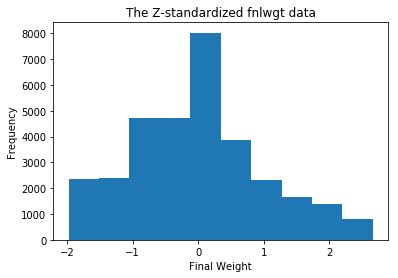


Plot of the education-num categorical attribute after data cleaning: 


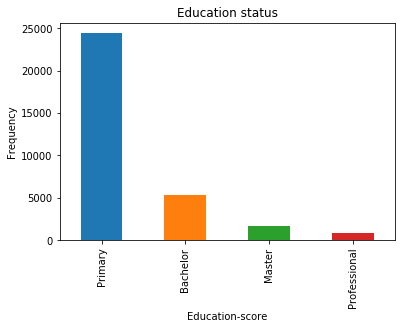


Plot of the workclass categorical attribute after data cleaning: 


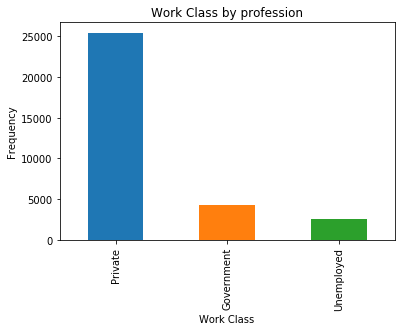


The final adult dataframe with the clustered "labels":
     fnlwgt  capital-gain  capital-loss  income Binned_age  \
0 -1.199815      0.755429     -0.217573       1          2   
1 -1.130503     -0.238499     -0.217573       1          3   
2  0.452321     -0.238499     -0.217573       1          2   
3  0.680472     -0.238499     -0.217573       1          3   
4  1.920656     -0.238499     -0.217573       1          1   

  Binned_hours-per-week  Government  Private  Unemployed  Bachelor  Master  \
0                     3           1        0           0         1       0   
1                     1           0        0           1         1       0   
2                     3           0        1           0         0       0   
3                     3           0        1           0         0       0   
4                     3           0        1           0         1       0   

   Primary  Professional  Female  Male  labels  
0        0             0       0     1       2  
1   

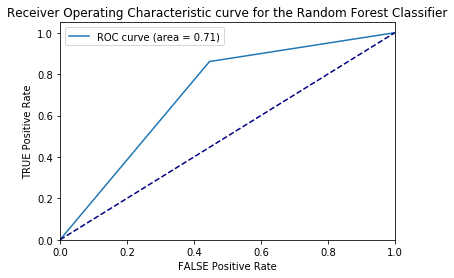


Logistic Regression classifier


Confusion matrix:
 [[ 650  826]
 [ 275 4709]]

TP, TN, FP, FN: 4709 , 650 , 826 , 275

Accuracy rate: 0.8295665634674922

Error rate: 0.17043343653250775

Precision: 0.85

Recall: 0.94

F1 score: 0.9

TP rates: [0.   0.94 1.  ]

FP rates: [0.   0.56 1.  ]

Probability thresholds: [2 1 0]

AUC score (using auc function): 0.69

AUC score (using roc_auc_score function): 0.69 



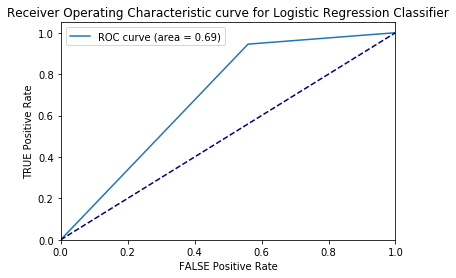

In [19]:
if __name__ == "__main__":
# Plot a histogram of the standardized fnlwgt data
    _zstdplot_main()
# Plot a histogram of the categorical education-num attribute
    _edunumplot_main()
# Plot a histogram of the categorical workclass column
    _workclassplot_main()
# Print the edited dataframe
    _printdf_main()
# Save the adult_analysis dataframe as a csv
    _csvsave_main()
# Print the analysis metrics for the Random Forest Classifier
    _rfclass_main()
# Plot the ROC
    _rfroc_main()
# Print the analysis metrics for the Random Forest Classifier
    _logregclass_main()
# Plot the ROC
    _logregroc_main()

The attributes used were as follows.
fnlwgt: Numerical, z-standardized values
capital-gain: Numerical, z-standardized values 
capital-loss: Numerical, z-standardized values
Binned_age: The numerical 'age' column, binned and categorized
Binned_hours-per-week: The numerical 'hours-per-week' column, binned and categorized
Male: Categorical column denoting the gender
Female: Categorical column denoting the gender
Primary: Categorical column denoting the education level, derived from the 'education-num' attribute
Bachelor: Categorical column denoting the education level, derived from the 'education-num' attribute
Master: Categorical column denoting the education level, derived from the 'education-num' attribute
Professional: Categorical column denoting the education level, derived from the 'education-num' attribute
Private: One hot encoded category derived from the 'workclass' column 
Government: One hot encoded category derived from the 'workclass' column
Unemployed: One hot encoded category derived from the 'workclass' column
income: Expert label column denoting whether the calssification is <=50000 or >50000

Relevant questions: 
1. Do the age, education level or gender of the individuals affect their annual income?
2. What is the effect of fnlwgt, capital-loss and capital-gain variables on the annual income? 
3. How much does work-hours of the individual influence the individual's annual income? For example, is there a direct correlation between the work-hours and income?
4. Is the annual income affected by the workclass/employment status?

For performing an unsupervised K-means clustering, the 14 attributes in the adult dataframe except the 'income' column, were loaded into a new dataframe termed 'adult_k'. The new dataframe had 14 columns and all 32297 instances. After clustering, the K-means transformed 'labels' were appended as a 16th column to the original 'adult' dataframe. 

I used the random forest and logistic regression classifiers to build and test the models. I found that excluding the fnlwgt column improved the accuracy of the predictions, so removed it. 
First, a Random Forest classification was performed to predict the income of the test data, after training the dataset with 80% of the data. I found that using the non-binned 'age' and 'hours-per-week' did not yield any worse result with the random forest classifier (data not shown) than with the binned variables. 
I used the default probability threshold of 0.5 for constructing the confusion matrix and the rest of the metrics. The preliminary analysis showed that the accuracy of the prediction was approximately 84%, using the random forest classifier on the attributes. The analysis metrics were printed along with the ROC curve. The AUC score was 0.70. 
With the logistic regression classifier, the accuracy of the prediction was approximately 83%. The AUC score was 0.71. 
Overall, I found that both the calssifiers showed more or less similar predictions, except that logistic regression showed a better recall of around 93%, while random forest maintained recall at 86%. 
The predicted labels and real values were then loaded into a new dataframe labeled 'adult_analysis', and saved as a csv file.
